<a href="https://colab.research.google.com/github/TrunnMosby/Time-Series-Forecasting-Using-FBprophet/blob/main/Oneweek_Onemonth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
twenty_data=pd.read_csv(r'/content/20_04_2021 (2).csv')

twentyone_data=pd.read_csv(r'/content/21_04_2021 (1).csv')
twentytwo_data=pd.read_csv(r'/content/22_04_2021.csv')

In [ ]:
train=pd.concat([twenty_data,twentyone_data,twentytwo_data])

In [ ]:
train=train.dropna()

In [ ]:
Close=[]
import re
pattern=r','
for i in train['Price']:
  if(re.search(pattern,str(i))):
    Close.append(re.sub(pattern,'',str(i)))

In [ ]:
Train=pd.DataFrame({'close':Close})

In [ ]:
df1=Train.reset_index()['close']

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.95)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
361/361 [==============================] - 58s 149ms/step - loss: 0.0107 - val_loss: 4.5674e-04
Epoch 2/100
361/361 [==============================] - 54s 148ms/step - loss: 3.8265e-04 - val_loss: 3.8303e-04
Epoch 3/100
361/361 [==============================] - 54s 149ms/step - loss: 3.0114e-04 - val_loss: 3.1049e-04
Epoch 4/100
361/361 [==============================] - 54s 148ms/step - loss: 2.9862e-04 - val_loss: 2.6726e-04
Epoch 5/100
361/361 [==============================] - 53s 148ms/step - loss: 2.4334e-04 - val_loss: 3.1054e-04
Epoch 6/100
361/361 [==============================] - 53s 148ms/step - loss: 2.4635e-04 - val_loss: 2.0238e-04
Epoch 7/100
361/361 [==============================] - 53s 148ms/step - loss: 1.7251e-04 - val_loss: 2.2441e-04
Epoch 8/100
361/361 [==============================] - 54s 149ms/step - loss: 1.8848e-04 - val_loss: 1.5685e-04
Epoch 9/100
361/361 [==============================] - 54s 149ms/step - loss: 1.7797e-04 - val_loss: 1.4498e

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

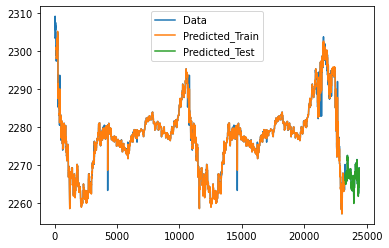

In [ ]:
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data','Predicted_Train','Predicted_Test'])
plt.show()

In [ ]:
twentythree_data=pd.read_csv(r'/content/23_04_2021.csv')

twentysix_data=pd.read_csv(r'/content/26_04_2021 (1).csv')
twentyseven_data=pd.read_csv(r'/content/27_04_2021.csv')
twentyeight_data=pd.read_csv(r'/content/28_04_2021.csv')

In [ ]:
c=pd.concat([twentythree_data,twentysix_data,twentyseven_data,twentyeight_data])

In [ ]:
len(c)

29974

In [ ]:
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30000):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

Streaming output truncated to the last 5000 lines.
 0.01268392 0.01268391 0.01268391 0.01268391 0.01268389 0.01268388
 0.01268386 0.01268383 0.01268382 0.01268379 0.01268379 0.01268381
 0.01268382 0.01268382 0.0126838  0.01268379 0.01268382 0.01268382
 0.01268382 0.01268382 0.01268382 0.01268384 0.01268383 0.01268382
 0.01268387 0.01268386 0.01268384 0.01268385 0.01268386 0.01268385
 0.01268388 0.01268385 0.01268385 0.01268386 0.01268384 0.01268385
 0.01268385 0.01268382 0.01268384 0.01268384 0.01268383 0.01268385
 0.01268385 0.01268383 0.01268383 0.01268386 0.01268387 0.01268382
 0.0126838  0.0126838  0.0126838  0.01268381 0.01268381 0.01268379
 0.01268379 0.01268382 0.0126838  0.01268382 0.01268382 0.01268383
 0.01268386 0.01268388 0.01268388 0.01268391 0.01268388 0.01268386
 0.01268385 0.01268385 0.01268382 0.01268382]
29722 day output [[0.01268381]]
29723 day input [0.01268381 0.0126838  0.01268381 0.0126838  0.0126838  0.01268381
 0.01268382 0.01268383 0.01268382 0.01268381 0.0126

In [ ]:
c

,Date,Price,Difference,Previous Close,Previous Open,Volume
0,22/04/2021 13:30:41,"2,293.23",-0.06 (-0.00%),"2,293.29","2,285.25","19,276"
1,22/04/2021 13:30:45,"2,291.24",-2.05 (-0.09%),"2,293.29","2,285.25","20,721"
2,22/04/2021 13:30:48,"2,291.84",-1.45 (-0.06%),"2,293.29","2,285.25","22,537"
3,22/04/2021 13:30:54,"2,291.55",-1.74 (-0.08%),"2,293.29","2,285.25","24,806"
4,22/04/2021 13:30:56,"2,291.61",-1.68 (-0.07%),"2,293.29","2,285.25","25,683"
...,...,...,...,...,...,...
8998,27/04/2021 19:59:50,"2,310.55",-16.19 (-0.70%),"2,326.74","2,336.00","1,194,018"
8999,27/04/2021 19:59:53,"2,309.07",-17.67 (-0.76%),"2,326.74","2,336.00","1,195,711"
9000,27/04/2021 19:59:57,"2,308.00",-18.74 (-0.81%),"2,326.74","2,336.00","1,196,402"
9001,27/04/2021 20:00:00,"2,307.66",-19.08 (-0.82%),"2,326.74","2,336.00","1,200,207"


In [ ]:
nine_Close=[]
import re
pattern=r','
for i in c['Price']:
  if(re.search(pattern,str(i))):
    nine_Close.append(re.sub(pattern,'',str(i)))

In [ ]:
nine_Data=pd.DataFrame({'close':nine_Close})

In [ ]:
df2=nine_Data.reset_index()['close']

In [ ]:
len(df3),len((lst_output)[-8998:])

(8998, 8998)

In [ ]:
ninet_Close=[]
import re
pattern=r','
for i in twentyeight_data['Price']:
  if(re.search(pattern,str(i))):
    ninet_Close.append(re.sub(pattern,'',str(i)))

In [ ]:
ninet_Data=pd.DataFrame({'close':ninet_Close})

In [ ]:
df3=ninet_Data.reset_index()['close']

In [ ]:
predicted=[]
original=[]
for i,j in zip(df3,scaler.inverse_transform(lst_output)[-8998:]):
  original.append(i)
  predicted.append(j)

In [ ]:
Predicted=[]
for i in predicted:
  Predicted.append(*i)

# 1 Week's Prediction

In [ ]:
Output_1week_ahead=pd.DataFrame({'Predicted':Predicted,'Data':original})
Output_1week_ahead

,Predicted,Data
0,2257.809941,2319.93
1,2257.809942,2315.30
2,2257.809941,2315.30
3,2257.809941,2320.16
4,2257.809941,2315.97
...,...,...
8993,2257.809939,2310.55
8994,2257.809938,2309.07
8995,2257.809937,2308.00
8996,2257.809938,2307.66


In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Output_1week_ahead['Data'],Output_1week_ahead['Predicted'])))

62.700431226432386


In [ ]:
Output_1week_ahead['Data']=np.array(Output_1week_ahead['Data']).reshape(8998)

In [ ]:
three_Close=[]
import re
pattern=r','
for i in twentythree_data['Price']:
  if(re.search(pattern,str(i))):
    three_Close.append(re.sub(pattern,'',str(i)))

In [ ]:
three_Data=pd.DataFrame({'close':three_Close})

In [ ]:
dff=three_Data.reset_index()['close']

In [ ]:
len(dff),len(lst_output[:8202])

(8201, 8202)

In [ ]:
predicted_three=[]
original_three=[]
for i,j in zip(dff,scaler.inverse_transform(lst_output)[:8201]):
  original_three.append(i)
  predicted_three.append(*j)

# 1 Day's Predictions


In [ ]:
Output_1day_ahead=pd.DataFrame({'Predicted':predicted_three,'Data':original_three})
Output_1day_ahead

,Predicted,Data
0,2267.848008,2293.23
1,2267.794205,2291.24
2,2267.721084,2291.84
3,2267.630510,2291.55
4,2267.528685,2291.61
...,...,...
8196,2257.809939,2315.30
8197,2257.809939,2315.30
8198,2257.809940,2315.30
8199,2257.809941,2315.30


In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Output_1day_ahead['Data'],Output_1day_ahead['Predicted'])))

43.49242452670207
